In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [104]:
#Baca data set di drive
dataset = pd.read_csv('/content/drive/My Drive/Dataset/DataQuiz/winequality-white.csv', sep=';')

In [105]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [106]:
#dataCleaning
#replace nilai ? dengan none
dataset.replace("?", np.nan, inplace=True)

dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [107]:
#Cek apakah ada nilai null
dataset.isnull().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

tidak ada nilai null

In [108]:
#cek info dari setiap feature
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


tidak ada yang string

In [126]:
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bea1db390>,
      dtype=object)

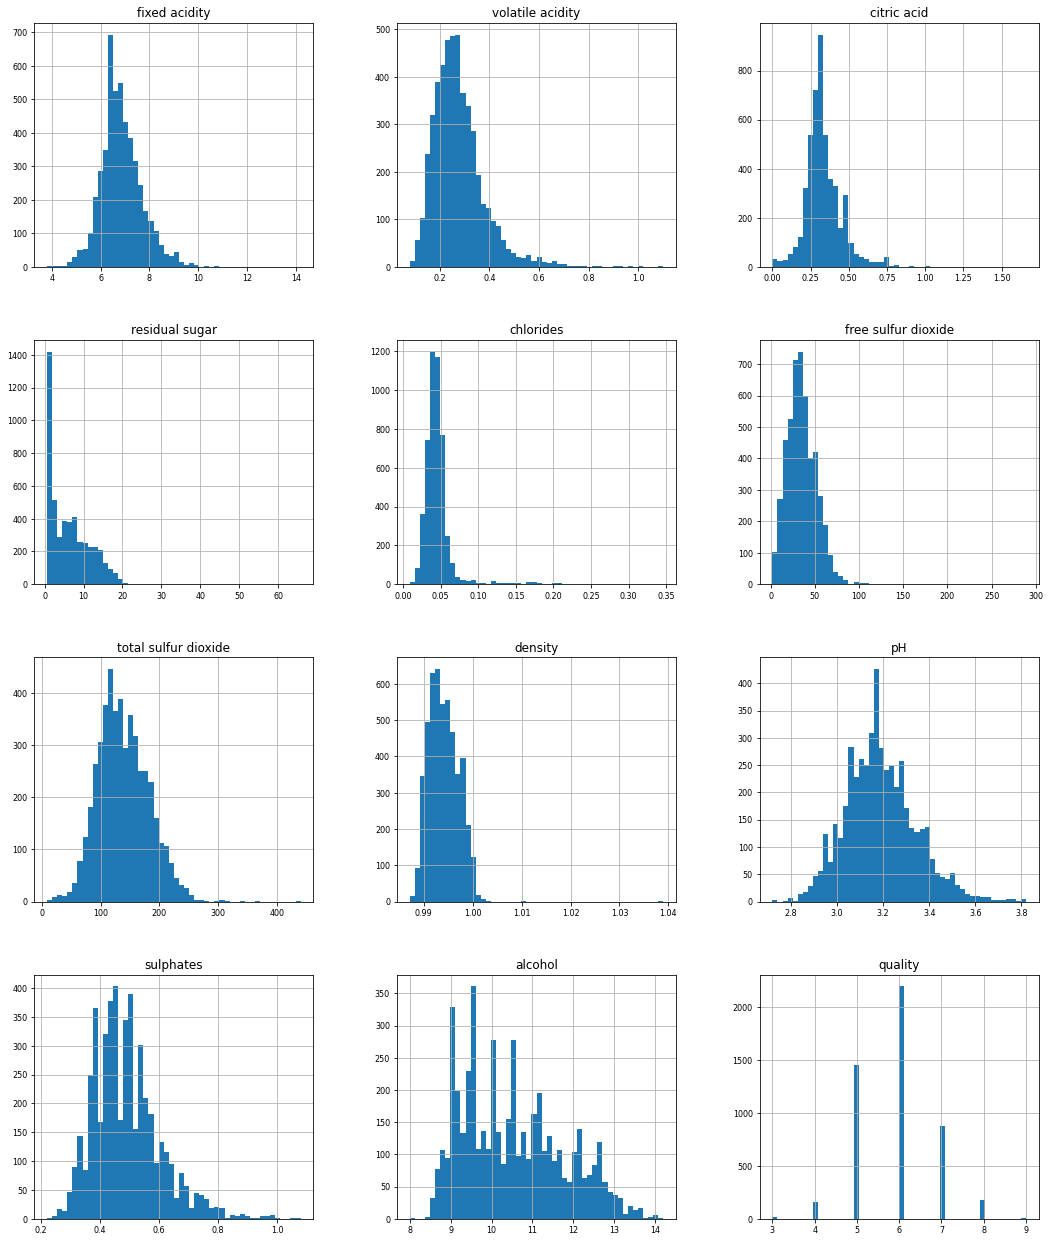

In [109]:
#plot grafik histogram
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [110]:
corr = dataset.corr()

corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


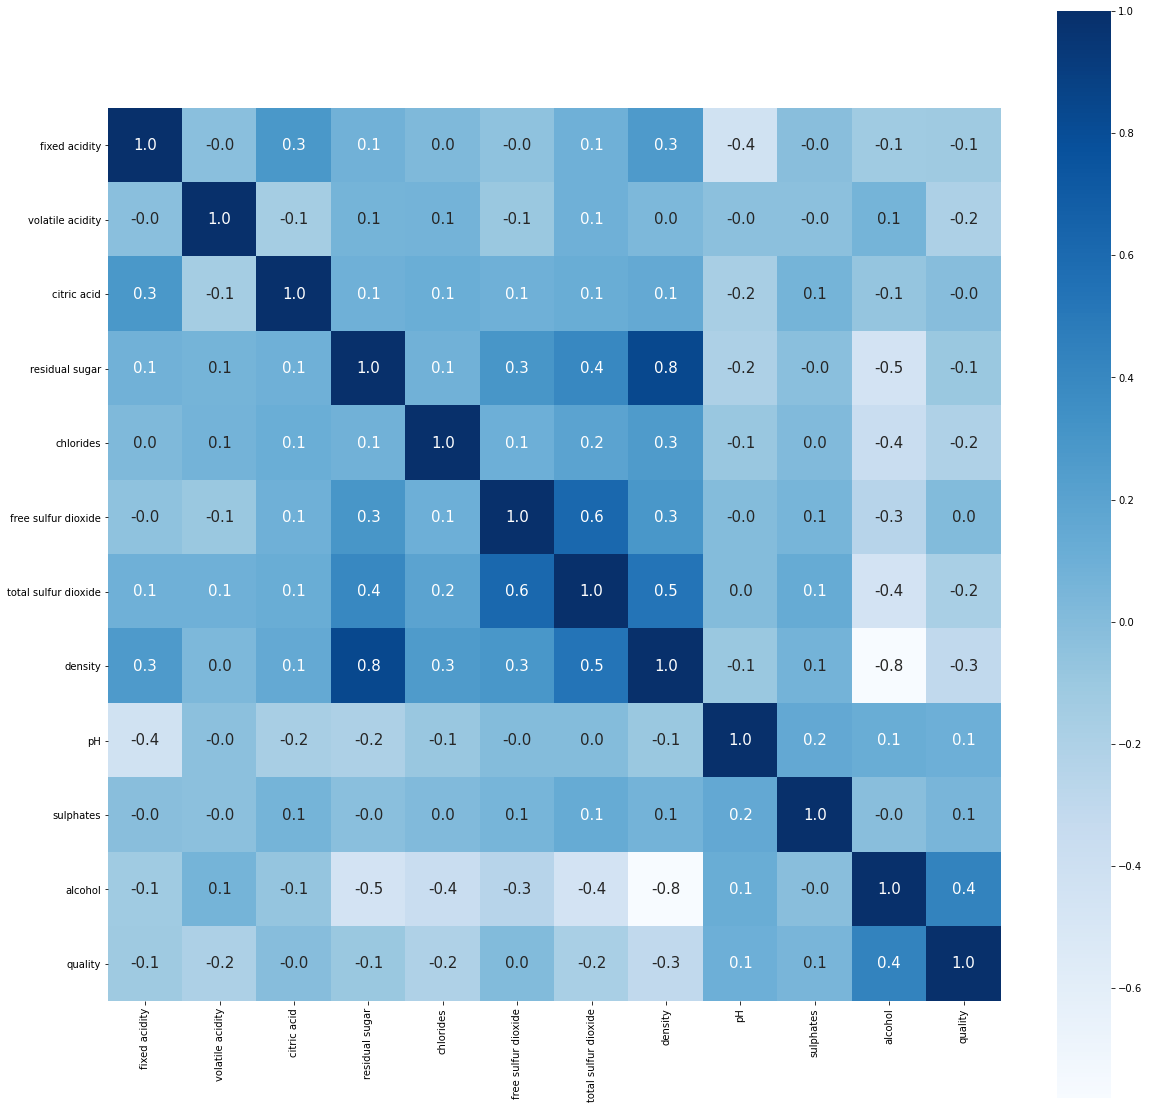

In [111]:
#melihat corelasi, 
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [112]:
#Feature engineering
#Target kita adalah quality, maka dari itu quality harus di drop 
label = dataset['quality']
features = dataset.drop(['quality'], axis=1)

In [113]:
#preprocessing menggunakan standar scaler, kemudian di fit kedalam featur dan label (menggunakan scikit learn)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [114]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

Training data

In [115]:
#Deep Learning
#saya gunakan 13 neuron, dan 11 input_dim (input_dim dilihat dari berapa banyak feature)
#initializer he_uniform, activation relu, optimizer sgd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(13, input_dim=11, kernel_initializer='he_uniform', activation='relu')) # 13 neuron, sesuai dengan 11 features
model.add(Dense(1, kernel_initializer='he_uniform'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [116]:
model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=300, batch_size=64)

Epoch 1/300
62/62 [==============================] - 0s 3ms/step - loss: 0.9639 - val_loss: 0.7117
Epoch 2/300
62/62 [==============================] - 0s 1ms/step - loss: 0.7017 - val_loss: 0.6600
Epoch 3/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6720 - val_loss: 0.6582
Epoch 4/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6719 - val_loss: 0.6616
Epoch 5/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6612 - val_loss: 0.6654
Epoch 6/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6596 - val_loss: 0.6509
Epoch 7/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6517 - val_loss: 0.6447
Epoch 8/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6471 - val_loss: 0.6360
Epoch 9/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6478 - val_loss: 0.6647
Epoch 10/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6467 - val_loss: 0.6459
Epoch 11/

In [117]:
#fungsi prediksi
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [118]:
#menentukan nilai mse, mae, dan akurasi r2score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.626727538262083
MAE (Mean Absolute Error) 0.6119023966759292
r^2 score 0.3557655741077298
RMSE (Root Mean Squared Error 0.7916612522171861


akurasi masih rendah, saya coba cara lain dengan deeper model


In [119]:
#3 layer, yaitu 13, 6, dan 1.
#epochs 100 dan batch_size=32
#optimizer rmsprop
from tensorflow.keras.optimizers import RMSprop
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=11, kernel_initializer='he_uniform', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='he_uniform', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='he_uniform'))
opt = RMSprop(lr=0.01)
deeper_model.compile(loss='mean_squared_error', optimizer=opt)

history = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=32)

Epoch 1/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7722 - val_loss: 0.7201
Epoch 2/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6697 - val_loss: 0.6484
Epoch 3/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6467 - val_loss: 0.6764
Epoch 4/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6367 - val_loss: 0.6413
Epoch 5/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6259 - val_loss: 0.6454
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6247 - val_loss: 0.6442
Epoch 7/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6149 - val_loss: 0.6442
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6163 - val_loss: 0.6463
Epoch 9/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 0.6356
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss: 0.6173 - val_lo

In [120]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6293571116422098
MAE (Mean Absolute Error) 0.6238558512581338
r^2 score 0.3530625467258707
RMSE (Root Mean Squared Error 0.7933203083510529


In [122]:
#plot untuk deeper model
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [123]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,val_loss,epoch
0,0.772233,0.720070,0
1,0.669658,0.648370,1
2,0.646696,0.676370,2
3,0.636715,0.641274,3
4,0.625906,0.645385,4
...,...,...,...
95,0.559783,0.637164,95
96,0.560824,0.614497,96
97,0.560999,0.635086,97
98,0.556454,0.626411,98


In [124]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
81,0.560992,0.610437,81
43,0.574758,0.611112,43
48,0.571084,0.611424,48
39,0.573438,0.614371,39
88,0.564982,0.614418,88
...,...,...,...
23,0.589292,0.677450,23
92,0.559075,0.681924,92
28,0.582714,0.689152,28
0,0.772233,0.720070,0


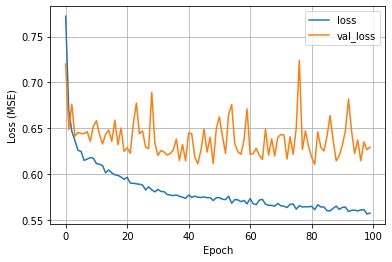

In [125]:
plot_loss(history) # epoch vs loss graph

akurasi yang saya dapatkan hanya 35.5% pada base model
